# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 1</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Wednesday, Sep 8 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

# Team Members

- Rohitashwa Chakraborty _(rc47878)_
- Sahitya Sundar Raj Vijayanagar _(sv25849)_


In [1]:
%matplotlib inline

# Question 1: MLOps (10 pts)
Read this [article](https://towardsdatascience.com/what-is-mlops-everything-you-must-know-to-get-started-523f2d0b8bd8) "What is MLOps — Everything You Must Know to Get Started", which gives a quick walkthrough of the machine learning development lifecycle and explains how MLOps come into play, or watch this [video](https://www.youtube.com/watch?v=06-AZXmwHjo) which you may find interesting.

## 1. (**4 pts**) Use your own words to describe what MLOps is, and what challenges MLOps address. Limit your answer to one paragraph

## **Answer 1**

MLOps is an engineering discipline the focuses on the _unification_, _standardisation_ and _streamlining_ of Machine Learning or Deep Learning systems. The primary aim is to facilitate continuous development and deployment of high-performing models in production environments _(i.e: MLOps is the intersection of Data Science and DevOps)_. As Machine Learning solutions become increasingly ubiqutous, so do the technical challenges of maintaining these systems. A typical ML solution lifecycle requires several cross-functional teams to work in tandem:

- **Business development or Product team** — _defining business objective with KPIs_
- **Data Engineering** — _data acquisition and preparation_
- **Data Science** — _architecting ML solutions and developing models_
- **IT / DevOps** — _complete deployment setup, monitoring alongside scientists_

Major challenges and bottlenecks that MLOps seeks to resolve are:

- Shortage of Data Scientists who are good at developing and deploying scalable web applications
- Reflecte changing business objectives in the model
- Communicate between the Technical and Functional teams
- Risk assessment

## 2. (**6 pts**) Describe what the main phases in MLOps are. Your answer should be 2-3 paragraphs

## **Answer 2**

Boo thaaaaang


# Question 2: Applications of Machine Learning (5 pts)
Read this [article](https://builtin.com/data-science/data-science-applications-examples) "17 Data Science Applications & Examples" and pick one of the data science systems used by various organizations according to this blog. 

For this system you have chosen, answer the following questions. Please limit your answer to one paragraph:

1. What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...) in this system?
2. Speculate on what kind of data may be needed and how the results can be useful to the organization.
3. What do you think are the ethical implications of using machine learning in a domain like this?

## Answer:

UberEats

However, when algorithms get implemented, drivers usually get angry. The more they drive, the less incentive they receive; the algorithm predicts that they would drive long hours regardless so there is no point of incentivizing with a weekly bonus. On the other hands, there are cases where drivers work too hard in order to hit the weekly bonus target, severely impacting their health.

This is an important issue because physical and mental health of drivers are at stake, while the algorithm has no idea about the hidden cost as it is designed to gamify and optimize for certain metrics. To address this issue, in the short term, Uber management teams is currently carefully examining algorithms that get deployed and intervene in the case that the algorithms get out of control. Operation teams constantly provide feedback to the data science team whenever there is a backlash from driver partners. Regarding other steps the company should take, short term, it should foster more collaboration between teams to gather better insights from drivers and riders to incorporate ethical elements in the product design and development process. Drivers partners should have a voice in how algorithms are pushed to them and product features that they use every day. Also, it should implement and champion more balanced business metrics like customer satisfaction score, safety metrics, etc. instead of purely focusing on top line growth. This will continue to become a big challenge as Uber is going public next year, facing more pressure from investors to grow more efficiently.

Airbnb

Ethical concerns
Potential price discrimination based on mapped micro-neighbourhoods, race, gender, ethnicity, income, etc. Host picture and name could intentionally or unintentionally influence booking decisions. Vice versa last minute cancellations by host.
Algorithms could be used for vertical agreements i.e based on the price of one firm/consumers reactions price prediction for other products/services resulting in higher prices.
Algorithmic pricing can intensify competition, infringe competition laws resulting in different price for customers for identical products/services.
Pricing decisions based on past bias/discrimination would mean that the algorithms continues the same practices rather than unlearn.

# Question 3: Simpson's Paradox (10 pts)
A data scientist should be careful about drawing unwarranted conclusions about any data that is presented. One of the 'gotchas' that can happen even in apparently very simple tabular summaries, is called Simpson's paradox.

Read this [article](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated), which explains why the computed efficacy of the Pfizer vaccine is misleadingly low (67.5%) when you lump all people together, but once you stratify people by age (which is the right thing to do), you get much higher efficacy numbers.

1.(**5 pts**) Explain in your own words what Simpson's paradox is, and how this 'paradox' can happen in real data.

2.(**5 pts**) Find and mention another example of Simpson's paradox (but not any of the 3 examples given in the Wikipedia entry for 'Simpson's paradox'), state why the paradox appeared in your chosen example. Also give a reference (URL) to your source for the chosen example.

## Answer:

# Question 4: Ridge and Lasso Regression (30 pts)

Download the dataset **Admission.csv** from Canvas and use the following codes to import the Admission dataset in Python. 

There are 7 features in the dataset:

1. GRE score
2. TOEFL score
3. University Rating
4. SOP(Statement of Purpose)
5. LOR(Letter of Recommendation)
6. CGPA
7. Research

And the target is **Chance of Admission**.

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [3]:
# Codes below will work for both Google Colab and Jupyter Notebook.
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression

## Load the dataset into pandas DataFrame
df = pd.read_csv('Admission.csv', index_col=0)
df = df.replace([np.inf, -np.inf], np.nan) # 
df = df.fillna(0) # Replace all the NaN values with 0

In [4]:
df.columns # Show you all the columns in this file

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [5]:
df.head() # Show you the first 5 rows in this file

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
y = df['Chance_of_Admit'] # The column named Chance_of_Admit is used as the target, and we store it in y
X = df.drop(['Chance_of_Admit'], axis=1) # We keep the remaining columns as the features, and store them in x

***

## 1

(**2 pts**) Split the data into a training set(75% of data) and a test set(25% of data), using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this. Print the first 5 rows of the training set after scaling.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
print("Size of Original data: ",y.shape[0])
print("Size of Test data (25%): ",y_test.shape[0])
print("Size of Training data (75%): ",y_train.shape[0])

Size of Original data:  400
Size of Test data (25%):  100
Size of Training data (75%):  300


In [8]:
from sklearn.preprocessing import scale
X_train_tr = scale(X_train)
X_test_tr = scale(X_test)
print(X_train_tr[0:5])

[[ 1.52725374  2.0917706   1.61594354  0.63150829  1.72829095  2.11370277
   0.90453403]
 [ 0.74180896  0.46308859 -0.9310778  -0.35266047 -1.04140609  0.29488827
   0.90453403]
 [ 0.56726568  0.13735218  1.61594354  0.63150829  0.62041214  0.26211684
   0.90453403]
 [-0.39272239 -0.51412062 -0.08207069  0.13942391  0.62041214 -0.80295471
  -1.1055416 ]
 [ 0.47999403  0.78882499  0.76693642  1.12359267  1.17435154  1.11417408
   0.90453403]]


***

## 2

(**5 pts**) Use [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) classes to do a **5-fold** cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from α=10^10 to α=10^−6. In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) 
so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen **α** based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using **MSE** as the scoring metric.


In [9]:
from sklearn.model_selection import KFold

alpha_list = 10**np.linspace(6,-6,100)

# Lasso Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold().split(X_test_tr):
        lmdl = linear_model.Lasso(alpha= alpha)
        lmdl.fit(X_train_tr[train_index],y_train.iloc[train_index])
        lmdl_preds = lmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(lmdl_preds, y_train.iloc[test_index]))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
lasso_alpha = cv["MSE"].idxmin()
lasso_error = cv.loc[lasso_alpha]["MSE"]
print("Lasso Regression Cross-Validation:\n\toptimal alpha = {alpha}\n\tMSE: {mse}".format(alpha = lasso_alpha, mse = lasso_error))

Lasso Regression Cross-Validation:
	optimal alpha = 0.002477076355991714
	MSE: 0.004595796102324209


In [10]:
# Ridge Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold().split(X_test_tr):
        rmdl = linear_model.Ridge(alpha= alpha)
        rmdl.fit(X_train_tr[train_index],y_train.iloc[train_index])
        rmdl_preds = rmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(rmdl_preds, y_train.iloc[test_index]))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
ridge_alpha = cv["MSE"].idxmin()
ridge_error = cv.loc[ridge_alpha]["MSE"]
print("Ridge Regression Cross-Validation:\n\toptimal alpha = {alpha}\n\tMSE: {mse}".format(alpha = ridge_alpha, mse = ridge_error))

Ridge Regression Cross-Validation:
	optimal alpha = 10.722672220103231
	MSE: 0.004540149680011794


***

## 3

(**5 pts**) Run ridge and lasso regression for all of the **α** specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (3pts). 

What do you qualitatively observe when the value of the regularization parameter changes (2pts)?


In [11]:
lasso_coeffs = pd.DataFrame(columns=X_train.columns, index=alpha_list)

for alpha in alpha_list:
    lmdl = linear_model.Lasso(alpha= alpha)
    lmdl.fit(X_train_tr,y_train)
    lasso_coeffs.loc[alpha] = lmdl.coef_

In [12]:
ridge_coeffs = pd.DataFrame(columns=X_train.columns, index=alpha_list)

for alpha in alpha_list:
    rmdl = linear_model.Ridge(alpha= alpha)
    rmdl.fit(X_train_tr,y_train)
    ridge_coeffs.loc[alpha] = rmdl.coef_

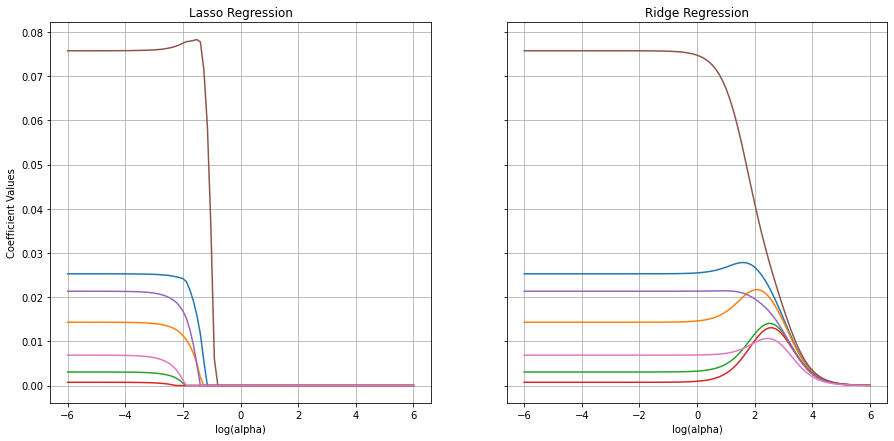

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, sharey=True, sharex=True)
fig.set_size_inches(15, 7,  forward=True)

ax[0].plot(np.log10(alpha_list),lasso_coeffs, label = lasso_coeffs.columns)
ax[0].set_ylabel("Coefficient Values")
ax[0].set_xlabel("log(alpha)")
ax[0].set_title("Lasso Regression")
ax[0].set_label(lasso_coeffs.columns)
ax[0].grid(True)

ax[1].plot(np.log10(alpha_list),ridge_coeffs, label = ridge_coeffs.columns)
# ax[1].set_ylabel("Coefficient Values")
ax[1].set_xlabel("log(alpha)")
ax[1].set_title("Ridge Regression")
ax[1].grid(True)

For **LASSO REGRESSION**, as the $\alpha$ value increases, i.e: the regularisation parameter increases, the value of the coefficients is set to **Zero**. Thus, We see that as $\alpha$ increases, all coefficients sharply drop to 0.

For **RIDGE REGRESSION** however, as the $\alpha$ value  increases, the value of the coefficients gradually approaches **ZERO**.

***

## 4

(**3 pts**) Take the exponential of Y_train as the target, and fit the 2 regression models again. Report the best chosen **α** based on cross validation as well as the corresponding scoring metric. Compare the results of using the original target with the results of using the exponential of the target. What do you observe? 

In [14]:
# Lasso Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold().split(X_test_tr):
        lmdl = linear_model.Lasso(alpha= alpha)
        lmdl.fit(X_train_tr[train_index],np.exp(y_train.iloc[train_index]))
        lmdl_preds = lmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(lmdl_preds, np.exp(y_train.iloc[test_index])))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
exp_lasso_alpha = cv["MSE"].idxmin()
exp_lasso_error = cv.loc[exp_lasso_alpha]["MSE"]
print("Lasso Regression Cross-Validation:\n\toptimal alpha = {alpha}\n\tMSE: {mse}".format(alpha = exp_lasso_alpha, mse = exp_lasso_error))

Lasso Regression Cross-Validation:
	optimal alpha = 0.004328761281083062
	MSE: 0.017668539670527846


In [15]:
# Ridge Regression

cv = []

for alpha in alpha_list:
    cv_error = []
    for train_index, test_index in KFold().split(X_test_tr):
        rmdl = linear_model.Ridge(alpha= alpha)
        rmdl.fit(X_train_tr[train_index],np.exp(y_train.iloc[train_index]))
        rmdl_preds = rmdl.predict(X_train_tr[test_index])
        cv_error.append(mean_squared_error(rmdl_preds, np.exp(y_train.iloc[test_index])))
    # cv.append(cv_error)
    cv.append(np.mean(cv_error))
    
cv = pd.DataFrame(cv, index=alpha_list, columns=["MSE"])
exp_ridge_alpha = cv["MSE"].idxmin()
exp_ridge_error = cv.loc[exp_ridge_alpha]["MSE"]
print("Ridge Regression Cross-Validation:\n\toptimal alpha = {alpha}\n\tMSE: {mse}".format(alpha = exp_ridge_alpha, mse = exp_ridge_error))

Ridge Regression Cross-Validation:
	optimal alpha = 10.722672220103231
	MSE: 0.01744727752195566


Upon training our models against $e^{y\_train}$ the MSE of the optimal model increases. This is because the $\sigma_{e^{y\_train}}$ also increases when y_train is exponentiated.

The Optimal $\alpha$ for Lasso Regression increases.

The Optimal $\alpha$ for Ridge Regression remains the same.

***

## 5

(**5 pts**) Similarly, use [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) to do linear regression with different **α** values, and plot the coefficients learned for each of them (2pts). Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models (3pts)

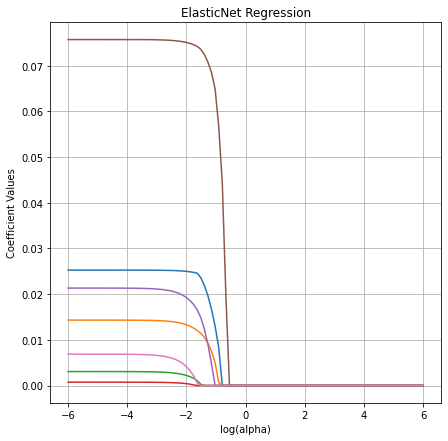

In [16]:
elastic_coeffs = pd.DataFrame(columns=X_train.columns, index=alpha_list)

for alpha in alpha_list:
    enet_mdl = linear_model.ElasticNet(alpha= alpha)
    enet_mdl.fit(X_train_tr,y_train)
    elastic_coeffs.loc[alpha] = enet_mdl.coef_

fig, ax = plt.subplots()
fig.set_size_inches(7, 7,  forward=True)

ax.plot(np.log10(alpha_list),elastic_coeffs, label = elastic_coeffs.columns)
ax.set_ylabel("Coefficient Values")
ax.set_xlabel("log(alpha)")
ax.set_title("ElasticNet Regression")
ax.grid(True)

# WRITE COMPARISION B/W LASSO, RIDGE, ELASTICNET

***

## 6

(**5 pts**) Run the following three regression models with **MSE** loss on the training data: 

a. linear regression without regularization (1pts)

b. linear regression with ridge regularization (2pts)

c. linear regression with lasso regularization (2pts)

For part (b) and (c), use only the best regularization parameters. Report the MSE and R<sup>2</sup> on the test data for each model.

In [26]:
from sklearn.metrics import r2_score

# Linear Regression without Regularisation
lm = linear_model.LinearRegression()
lm.fit(X_train_tr,y_train)
pred = lm.predict(X_test_tr)
lm_mse = mean_squared_error(pred, y_test)
lm_r2 = r2_score(y_test, pred)

print("Metrics - Linear Regression (No Regularisation):")
print("\tMSE:", lm_mse)
print("\tR\u00b2:", lm_r2)

# Lasso Regression
lasso_mdl = linear_model.Lasso(alpha=lasso_alpha)
lasso_mdl.fit(X_train_tr,y_train)
pred = lasso_mdl.predict(X_test_tr)
lasso_mse = mean_squared_error(pred, y_test)
lasso_r2 = r2_score(y_test, pred)


print("\nMetrics - Lasso Regression (alpha = {alp}):".format(alp = lasso_alpha.round(5)))
print("\tMSE:", lasso_mse)
print("\tR\u00b2:", lasso_r2)

# Ridge Regression
ridge_mdl = linear_model.Ridge(alpha=ridge_alpha)
ridge_mdl.fit(X_train_tr,y_train)
pred = ridge_mdl.predict(X_test_tr)
ridge_mse = mean_squared_error(pred, y_test)
ridge_r2 = r2_score(y_test, pred)


print("\nMetrics - Ridge Regression (alpha = {alp}):".format(alp = ridge_alpha.round(2)))
print("\tMSE:", ridge_mse)
print("\tR\u00b2:", ridge_r2)


Metrics - Linear Regression (No Regularisation):
	MSE: 0.005200215496311308
	R²: 0.6910288907914793

Metrics - Lasso Regression (alpha = 0.00248):
	MSE: 0.0051355899624000775
	R²: 0.694868620685348

Metrics - Ridge Regression (alpha = 10.72):
	MSE: 0.00509030956856604
	R²: 0.6975589579450683


***

## 7

(**5 pts**) Train the 3 models and report the metrics with the original data without scaling (3pts). 

Why do we need to scale the data before regularization (2pts)? 

## Answer:


In [25]:
from sklearn.metrics import r2_score

# Linear Regression without Regularisation
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)
lm_mse = mean_squared_error(pred, y_test)
lm_r2 = r2_score(y_test, pred)

print("Metrics - Linear Regression (No Regularisation):")
print("\tMSE:", lm_mse)
print("\tR\u00b2:", lm_r2)

# Lasso Regression
lasso_mdl = linear_model.Lasso(alpha=lasso_alpha)
lasso_mdl.fit(X_train,y_train)
pred = lasso_mdl.predict(X_test)
lasso_mse = mean_squared_error(pred, y_test)
lasso_r2 = r2_score(y_test, pred)


print("\nMetrics - Lasso Regression (alpha = {alp}):".format(alp = lasso_alpha.round(5)))
print("\tMSE:", lasso_mse)
print("\tR\u00b2:", lasso_r2)

# Ridge Regression
ridge_mdl = linear_model.Ridge(alpha=ridge_alpha)
ridge_mdl.fit(X_train,y_train)
pred = ridge_mdl.predict(X_test)
ridge_mse = mean_squared_error(pred, y_test)
ridge_r2 = r2_score(y_test, pred)


print("\nMetrics - Ridge Regression (alpha = {alp}):".format(alp = ridge_alpha.round(2)))
print("\tMSE:", ridge_mse)
print("\tR\u00b2:", ridge_r2)


Metrics - Linear Regression (No Regularisation):
	MSE: 0.004526319242200032
	R²: 0.731068476318641

Metrics - Lasso Regression (alpha = 0.00248):
	MSE: 0.004698656575543514
	R²: 0.720829043533799

Metrics - Ridge Regression (alpha = 10.72):
	MSE: 0.004559248936717891
	R²: 0.7291119565843536


# WHY DO WE NEED TO SCALE?
***
***